# T4MP Analyst. Тестовое задание 


## Задача:

**Набор открытых данных**

#### **Всероссийский реестр объектов спорта с видами спорта**

[https://data.gov.ru/opendata/7703771271-sportobjects/data-20160714T0856-structure-20160714T0856.csv](https://data.gov.ru/opendata/7703771271-sportobjects/data-20160714T0856-structure-20160714T0856.csv)

> Отчет подготовить в виде Jupyter Notebook
> 

### 1. EDA


### 2. **Подготовить срез данных по списку спортивных объектов, дополнить преобразованными или внешними данными:**

- "Название" - строка, обязательно

- "Адрес" - строка, обязательно

- "Тип населенного пункта" ("город", "поселок" и т.д.) - строка, обязательно

- "Почтовый индекс" - строка, опционально

- "E-mail" - строка, обязательно

- "Даты крупных соревнований и значимых событий" - строка, опционально

- "Общий объём финансирования (руб.)" - целое число, обязательно

- "Общий объём финансирования (EUR)" (по курсу ЦБ РФ, на дату выполнения задания) - целое число, опционально

- "Общий объём финансирования (USD)" (по курсу ЦБ РФ на дату завершения строительства/реконструкции) - целое число, опционально

- "Доля от объема финансирования в регионе" (от общего объема финансирования приведенных объектов того же субъекта федерации) - число, обязательно

- "Продолжительность строительства/реконструкции (дней)" - целое число, опционально

- "Наличие зимних олимписких видов спорта в видах спорта объекта" - булев тип, обязательно


### 3. **Отчет по субъектам федерации:**

- "Субъект федерации" - строка, обязательно

- "Количество спортивных объектов" - целое число, обязательно

- "Суммарный объем финансирования - строительство (руб.)" - целое число, обязательно

- "Перечень типов спортивных объеков" (отсортированных по алфавиту) - строка, обязательно

- "ТОП-5 доступных видов спорта" (по представленности в объектах региона, с указанием числа объектов) - строка, обязательно

### 4. **Итоговый ноутбук выложить в закрытый репозиторий github, дать доступ аккаунту @AlxFltv**

<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [0. Импорт библиотек и загрузка данных](#0.)
* [1. EDA](#1.) 
    * [Базовая информация](#10.) 
    * [Проверка на полноту и адекватность](#100.) 
        * [Название](#11.)
        * [Активный](#12.)
        * [Адрес](#13.)
        * [E-mail](#14.)
        * [Общий объём финансирования (руб.)](#15.)
        * [Тип спортивного комплекса](#16.)
        * [Виды спорта](#17.)
    * [Итог](#18.)
* [2. Cрез данных по списку спортивных объектов](#2.)
    * [Что необходимо досчитать?](#20.)
        * [Тип населенного пункта](#21.)
        * [Почтовый индекс](#22.)
        * [Даты крупных соревнований и значимых событий](#23.)
        * [Общий объём финансирования EUR и USD](#24.)
        * [Доля от объема финансирования в регионе](#25.)
        * [Продолжительность строительства/реконструкции (дней)](#26.)
        * [Наличие зимних олимписких видов спорта в видах спорта объекта](#27.)
    * [Итог](#28.)
* [3. Отчет по субъектам федерации](#3.)
    * 
        * [Суммарный объем финансирования - строительство (руб.)](#31.)
        * [Количество спортивных объектов](#32.)
        * [Перечень типов спортивных объеков](#33.)
        * ["ТОП-5 доступных видов спорта"](#34.)
    * [Итог](#35.)

## 0. Импорт библиотек и загрузка данных
<a name="0."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [1]:
#Импортируем все необходимые библиотеки

import numpy as np
import pandas as pd
import datetime
import itertools
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

from termcolor import colored
from bs4 import BeautifulSoup
from collections import Counter
from pymystem3 import Mystem
from validate_email import validate_email

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
headers = {'User-Agent': user_agent}

In [2]:
#Определяем болд
def bold(): 
    return "\033[1m"

def bold_end(): 
    return "\033[0m"

#Ставим формат для нумериков
pd.options.display.float_format = '{: >10.2f}'.format

In [3]:
#**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

#* base - название базы данных
#* info - 1: вывод информации о массиве, другое: не вывод
#* describe - 1: вывод описания переменных массива, другое: не вывод        
#* duplicat - 1: вывод количества полных дублей
#* head - n: вывод примера базы (вывод n - строк), n < 1: не вывод

def print_basic_info(base, info, describe, duplicat, head):
    if info == 1:
        print("\n", bold(), colored('info','green'), bold_end(), "\n")
        print( base.info())  
    if head >= 1:
        print("\n", bold(),colored('head','green'),bold_end())
        display(base.head(head))
    if describe == 1:
        print("\n", bold(),colored('describe','green'),bold_end(),"\n")
        for i in base.columns:
            print("\n", bold(), colored(i,'blue'),bold_end(),"\n", base[i].describe())
    if duplicat == 1:
        print("\n", bold(),colored('duplicated','green'),bold_end(),"\n")
        print(base[base.duplicated() == True][base.columns[0]].count())

In [4]:
raw_data = pd.read_csv('https://data.gov.ru/opendata/7703771271-sportobjects/data-20160714T0856-structure-20160714T0856.csv',  sep=',',decimal='.')

## 1. EDA
<a name="1."></a>
### Базовая информация
<a name="10."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [149]:
#распечатаем базовую инфо
print_basic_info(raw_data,1,0,0,5)


  info  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 844
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Название                                              810 non-null    object        
 1   Адрес                                                 810 non-null    object        
 2   Общий объём финансирования (руб.)                     810 non-null    float64       
 3   Виды спорта                                           810 non-null    object        
 4   Субъект федерации                                     810 non-null    object        
 5   Тип спортивного комплекса                             810 non-null    object        
 6   E-mail                                                458 non-null    object        
 7   Населённый пункт                                      810 non-null   

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool,Есть виды спорта,Описание,Виды спорта 2
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,132844000.00,4261000.00,0.00,Y,строительство,147105000.00,False,Y,крытый плавательный бассейн « садко » сдюсшор ...,"общая физическая подготовка, плавание"
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,63014000.00,3315000.00,0.00,Y,строительство,83829000.00,False,Y,спортивный зал для мини-футбол отдельно стоящи...,"футбол, мини-футбол"
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,8293100.00,587035000.00,129396500.00,Y,строительство,814724600.00,False,Y,ледовый дворец спорт ледовый дворец спорт в го...,"шахматы, хореография, фигурное катание, плаван..."
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,...,150646000.00,1519000.00,0.00,Y,строительство,212165000.00,False,Y,спортивный центр с плавательный бассейн спорти...,"общая физическая подготовка, игровые виды спор..."
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",...,114058000.00,12388000.00,0.00,Y,строительство,143946000.00,True,Y,спортивный центр с универсальный игровой зал о...,"баскетбол, настольный теннис, теннис, игровые ..."


In [6]:
# Для удобства уберем двоеточие в конце названий колонок и сразу перееименуем колону с оьемом финансирования в нужный нам формат

raw_columns_list = list(raw_data.columns.values)
raw_columns_list[0:5]

['id:',
 'Название:',
 'Название (in english):',
 'Активный:',
 'Краткое описание:']

In [7]:
raw_columns_list = [c.replace(':', '') for c in raw_columns_list]
raw_columns_list = [c.replace('Общий объём финансирования', 'Общий объём финансирования (руб.)') for c in raw_columns_list]

raw_columns_list[0:5]

['id', 'Название', 'Название (in english)', 'Активный', 'Краткое описание']

In [8]:
raw_data.columns = raw_columns_list

In [9]:
# Много строчек. Все ли нам нужны? найдем те что нам точно нужны . посмотрим списком 
raw_data.columns.to_list()

['id',
 'Название',
 'Название (in english)',
 'Активный',
 'Краткое описание',
 'Детальное описание',
 'Краткое описание (in english)',
 'Детальное описание (in english)',
 'МО',
 'Субъект федерации',
 'Значимость',
 'Населённый пункт',
 'Населённый пункт (in english)',
 'Адрес',
 'Адрес (in english)',
 'ОКТМО',
 'ФЦП (федеральная целевая программа)',
 'Действия с объектом',
 'Дата начала строительства / реконструкции',
 'Дата завершения строительства / реконструкции',
 'Общий объём финансирования (руб.)',
 'Финансирование из федерального бюджета',
 'Финансирование из федерального бюджета (из них освоено)',
 'Финансирование из бюджета субъекта федерации',
 'Финансирование из бюджета субъекта федерации (из них освоено)',
 'Финансирование из бюджета муниципального образования',
 'Финансирование из бюджета муниципального образования (из них освоено)',
 'Финансирование из внебюджетных источников',
 'Финансирование из внебюджетных источников (из них освоено)',
 'Ключевой или нет?',
 'Курир

In [10]:
# Какие минимальные требования к нашему датасету?
# Исходя из той информации которую нам нужно получить нужна информация в текущих столбцах

columns_min =['Название', 'Адрес', 'Общий объём финансирования (руб.)', 'Виды спорта', 
              'Субъект федерации','Тип спортивного комплекса'
              #  емайл пишем с оговоркой, несмотря на обязательность очень обидно будет удалять незаполненнные
              ,'E-mail']


In [150]:
# так как колонок очень много попробуем дополнить лист минимальных колонок теми которые нам пригодятся.

need_columns_extended = columns_min + [
                            'Населённый пункт',
                            'Краткое описание',
                            'Детальное описание',
                            'Дата начала строительства / реконструкции',
                            'Дата завершения строительства / реконструкции',
                            'URL сайта',
                            'Финансирование из федерального бюджета',
                            'Финансирование из бюджета субъекта федерации',
                            'Финансирование из бюджета муниципального образования',
                            'Финансирование из внебюджетных источников',
                            'Активный',
                            'Действия с объектом'
                             ]

In [151]:
raw_data = raw_data[need_columns_extended]
raw_data.head()

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,2006-12-01,2008-12-31,NaN,10000000.00,132844000.00,4261000.00,0.00,Y,строительство
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",2007-06-01,2009-12-30,NaN,17500000.00,63014000.00,3315000.00,0.00,Y,строительство
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,2008-06-01,2011-11-05,NaN,90000000.00,8293100.00,587035000.00,129396500.00,Y,строительство
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,2006-12-15,2009-12-24,NaN,60000000.00,150646000.00,1519000.00,0.00,Y,строительство
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",2008-01-14,2011-12-30,NaN,17500000.00,114058000.00,12388000.00,0.00,Y,строительство


In [13]:
# 'Дата начала строительства / реконструкции' и 'Дата начала строительства / реконструкции' 
# вероятно потребуется перевести в формат даты.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Название                                              928 non-null    object 
 1   Адрес                                                 928 non-null    object 
 2   Общий объём финансирования (руб.)                     928 non-null    float64
 3   Виды спорта                                           794 non-null    object 
 4   Субъект федерации                                     928 non-null    object 
 5   Тип спортивного комплекса                             925 non-null    object 
 6   E-mail                                                460 non-null    object 
 7   Населённый пункт                                      928 non-null    object 
 8   Краткое описание                                      762 no

### Проверка наполноту адекватность
<a name="100."></a>
#### Название
<a name="11."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [14]:
print(raw_data['Название'].value_counts())

raw_data[raw_data['Название'].isna()]

Физкультурно-оздоровительный комплекс                72
ДЮСШ                                                 19
Спортивный комплекс                                  15
Плавательный бассейн                                 14
Футбольное поле с искусственным покрытием            14
                                                     ..
Плавательный бассейн «Аквамарин» ДЮСШ «Нефтяник»      1
Бассейн СОШ № 11                                      1
Горнолыжная база «Морозная»                           1
ФОК с плавательным бассейном                          1
Региональный центр-СДЮСШОР по зимним видам спорта     1
Name: Название, Length: 646, dtype: int64


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом
928,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN


In [15]:
#всего один и вся строка пустая - удалим

raw_data  =  raw_data.dropna(subset=['Название'])
raw_data[raw_data['Название'].isna()]

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом


#### Активный
<a name="12."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [16]:
# интересно что застолбец активный и нужны ли нам неактивные обьекты и сколько их
raw_data['Активный'].value_counts()
# Большенство активных. Посмотри на неактивных

Y    847
N     81
Name: Активный, dtype: int64

In [17]:
table_active =raw_data.pivot_table(index=
    'Субъект федерации', columns='Активный',values = 'Адрес',  aggfunc='count', fill_value = 0).reset_index()

table_active['total'] =  table_active['N'] + table_active['Y']
table_active['N'] = table_active['N']/table_active['total'] * 100
table_active['Y'] = table_active['Y']/table_active['total'] * 100
table_active.head()

Активный,Субъект федерации,N,Y,total
0,Алтайский край,37.50,62.50,8
1,Амурская область,40.00,60.00,5
2,Архангельская область,16.67,83.33,6
3,Астраханская область,0.00,100.00,12
4,Белгородская область,0.00,100.00,14


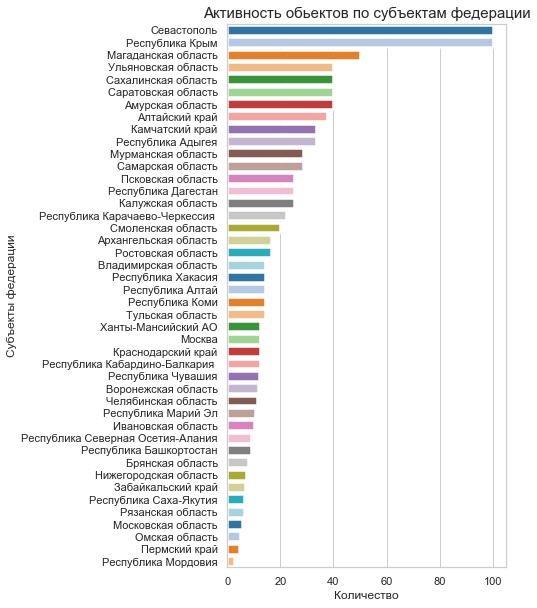

In [18]:
# Визуализируем
sns.set(style="whitegrid")
plt.figure(figsize = (5,10)) 
data = table_active[table_active['N'] > 0].sort_values(by = 'N' , ascending = False)
sns.barplot(y='Субъект федерации', x='N', data=data, palette="tab20", linewidth=2.5)
plt.title('Активность обьектов по субъектам федерации', fontsize=15)
plt.ylabel("Субъекты федерации")
plt.xlabel("Количество")
plt.show()

В Крыму и Севастополе такие все. Видимо они еще не построились и только в процессе. Посмотрим процент недостроенных среди них.

In [19]:
#кажется они по времени могу быть не достроены
raw_data[raw_data['Активный'] == 'N'][columns_min + ['Дата завершения строительства / реконструкции','Действия с объектом','Финансирование из федерального бюджета',
                            'Финансирование из бюджета субъекта федерации',
                            'Финансирование из бюджета муниципального образования',
                            'Финансирование из внебюджетных источников']].head()


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Дата завершения строительства / реконструкции,Действия с объектом,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников
825,Футбольное поле с искусственным покрытием ДЮСШ,"Воронежская область, пос. Стрелица, ул. Космон...",23530000.00,"мини-футбол, русская лапта, футбол",Воронежская область,футбольное поле,semilukskayadyussh@mail.ru,01.05.2014,строительство,8421000.00,15000000.00,109000.00,0.00
845,ГУДО ТО ДЮСШ «Академия футбола»,"Тульская область, Ленинский район, пос. Обидим...",0.00,футбол,Тульская область,NaN,NaN,NaN,другое,0.00,0.00,0.00,0.00
846,Физкультурно-оздоровительный комплекс,"Веневский район, г. Венев, мкр. Южный, ул. Стр...",0.00,NaN,Тульская область,многофункциональный спортивный комплекс,NaN,NaN,строительство,0.00,0.00,0.00,0.00
847,Крытый плавательный бассейн,"Владимирская область, Суздальский район, с. До...",0.00,плавание,Владимирская область,бассейн,NaN,NaN,строительство,0.00,0.00,0.00,0.00
848,МБУ Физкультурно-оздоровительный комплекс «Десна»,"Смоленская область, г. Десногорск, 2 микрорайон",0.00,NaN,Смоленская область,многофункциональный спортивный комплекс,NaN,NaN,строительство,0.00,0.00,0.00,0.00


In [20]:
# сколько без информации о неактивных?

print(len(raw_data[(raw_data['Активный'] == 'N') &(raw_data[
    'Дата завершения строительства / реконструкции'].isna())]))

80


In [21]:
# сколько без информации об активных?

print(len(raw_data[(raw_data['Активный'] == 'N') &(raw_data[
    'Общий объём финансирования (руб.)']  == 0.00 )]))

80


In [22]:
# сколько без информации об активных?

print(len(raw_data[(raw_data['Активный'] == 'Y') &(raw_data[
    'Дата завершения строительства / реконструкции'].isna() == False)]))

# к сожалению есть и такие  хорошо что только 2%
# вероятней всего дату окончания не обновили в регистре и она значится пустой

829


In [23]:
raw_data[(raw_data['Активный'] == 'Y') &(raw_data[
    'Дата завершения строительства / реконструкции'].isna())][columns_min + ['Дата завершения строительства / реконструкции','Действия с объектом','Финансирование из федерального бюджета',
                            'Финансирование из бюджета субъекта федерации',
                            'Финансирование из бюджета муниципального образования',
                            'Финансирование из внебюджетных источников']].head()


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Дата завершения строительства / реконструкции,Действия с объектом,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников
311,ФГУП Учебно-тренировочный центр «Новогорск»,"Московская область, г. Химки, мкр. Новогорск, ...",7305398700.00,"баскетбол, волейбол, гандбол, дзюдо, кёрлинг, ...",Московская область,многофункциональный спортивный комплекс,NaN,NaN,строительство,7305398700.00,0.00,0.00,0.00
312,ФГБУ Тренировочный центр сборных команд России...,"Московская область, дер. Агафониха",4665147200.00,"бадминтон, водное поло, настольный теннис, пла...",Московская область,многофункциональный спортивный комплекс,ozero-krugloe@mail.ru,NaN,строительство,4665147200.00,0.00,0.00,0.00
314,Федеральный тренировочный центр «Парамоново» (...,"Московская область, пос. Парамоново",3329838200.00,"баскетбол, бобслей, волейбол, мини-футбол, сан...",Московская область,многофункциональный спортивный комплекс,NaN,NaN,строительство,3329838200.00,0.00,0.00,0.00
315,ФГУП Республиканская учебно-тренировочная база...,"Тульская область, г. Алексин, ул. Чехова, 21",1619267200.00,"армспорт (армрестлинг), баскетбол на колясках,...",Тульская область,многофункциональный спортивный комплекс,NaN,NaN,строительство,1619267200.00,0.00,0.00,0.00
317,Антидопинговый центр на базе ФГБУ «Федеральный...,"г. Москва, пер. Елизаветинский, 10, стр.1",1038306000.00,NaN,Москва,многофункциональный спортивный комплекс,NaN,NaN,строительство,1038306000.00,0.00,0.00,0.00


In [24]:
# сколько без информации об активных?

print(len(raw_data[(raw_data['Активный'] == 'Y') &(raw_data[
    'Общий объём финансирования (руб.)']  == 0.00 )]))

print(len(raw_data[(raw_data['Активный'] == 'Y') &(raw_data[
    'Дата завершения строительства / реконструкции'].isna())]))

# к сожалению есть и такие

11
18


In [25]:
# удалим 80 из 81 неактивных кейса в них в них нет информации. об окончании строитестьтва и Общий объём финансирования (руб.)

raw_data = raw_data[(raw_data['Активный'] == 'Y') | (raw_data[
    'Общий объём финансирования (руб.)']  != 0.00 )]

print(len(raw_data[(raw_data['Активный'] == 'N') &(raw_data[
    'Общий объём финансирования (руб.)']  == 0.00 )]))

0


#### Адрес
<a name="13."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [26]:
raw_data.loc[:,['Адрес','Субъект федерации', 'Населённый пункт']].head()

,Адрес,Субъект федерации,Населённый пункт
0,"Ханты-Мансийский автономный округ, г. Советски...",Ханты-Мансийский АО,г. Советский
1,"Ханты-Мансийский автономный округ, г. Лангепас...",Ханты-Мансийский АО,г. Лангепас
2,"Ханты - Мансийский автономный округ, г. Сургут...",Ханты-Мансийский АО,г. Сургут
3,"Ханты-Мансийский автономный округ, пос. Лыхма,...",Ханты-Мансийский АО,пос. Лыхма
4,"Ханты-Мансийский автономный округ-Югра, г. Лан...",Ханты-Мансийский АО,г. Лангепас


In [27]:
raw_data.loc[1,['Адрес']].values

array(['Ханты-Мансийский автономный округ, г. Лангепас, ул. Солнечная, 23/б'],
      dtype=object)

In [28]:
# смотрим что нет пропусков

print('Адрес:',len(raw_data[raw_data['Адрес'].isna()]),
      '\nСубъект федерации:', len(raw_data[raw_data['Субъект федерации'].isna()]),
      '\nНаселённый пункт:', len(raw_data[raw_data['Населённый пункт'].isna()]))

Адрес: 0 
Субъект федерации: 0 
Населённый пункт: 0


In [29]:
# т.к стринг попробуем и так проверить

print('Адрес:',len(raw_data[raw_data['Адрес'] == '']),
      '\nСубъект федерации:', len(raw_data[raw_data['Субъект федерации'] == '']),
      '\nНаселённый пункт:', len(raw_data[raw_data['Населённый пункт'] == '']))

Адрес: 0 
Субъект федерации: 0 
Населённый пункт: 0


In [30]:
# посмотрим что нет больших перекосов по субъектам и населеным пунктам (пример все из одного региона и города)

raw_data['Субъект федерации'].value_counts().head(10)

Республика Мордовия     41
Воронежская область     24
Республика Чувашия      22
Пензенская область      22
Краснодарский край      21
Пермский край           21
Омская область          20
Республика Татарстан    19
Оренбургская область    19
Тамбовская область      18
Name: Субъект федерации, dtype: int64

In [31]:
raw_data['Населённый пункт'].value_counts().head(10)

г. Саранск        12
г. Тамбов          8
г. Пенза           7
г. Ижевск          7
г. Новосибирск     7
г. Москва          7
г. Омск            7
г. Уфа             6
г. Брянск          6
г. Йошкар-Ола      6
Name: Населённый пункт, dtype: int64

In [32]:
# Многовато мордовии.Вроде не критично, по посмотрим поближе. возможно связанно с чемпионатом по футболу в 2008
raw_data['Год завершения строительства / реконструкции'] = raw_data[
    'Дата завершения строительства / реконструкции'].str.split('.', expand = True)[2].astype('float')

raw_data['total'] = 1
table_mordovia = raw_data[(raw_data['Субъект федерации']  == 'Республика Мордовия')].groupby([
    'Год завершения строительства / реконструкции'])['total'].sum().reset_index()


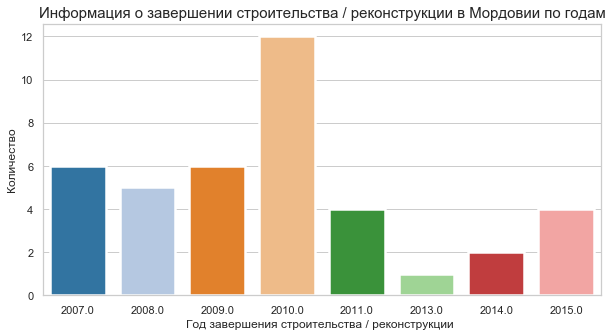

In [33]:
# Визуализируем
sns.set(style="whitegrid")
plt.figure(figsize = (10,5)) 
data = table_mordovia
sns.barplot(x='Год завершения строительства / реконструкции', y= 'total', data=data, palette="tab20", linewidth=2.5)
plt.title('Информация о завершении строительства / реконструкции в Мордовии по годам', fontsize=15)
plt.xlabel('Год завершения строительства / реконструкции ')
plt.ylabel("Количество")
plt.show()

In [34]:
# в 2010 было завершено много обьектов

#### E-mail
<a name="14."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [35]:
# Сколько нет?
print("Нет емайлов:", len(raw_data[raw_data['E-mail'].isna()]))

Нет емайлов: 388


In [36]:
raw_data['E-mail'].value_counts().head()

sportstroy@mail.ru               19
tehnadzor.minsportrme@mail.ru    15
aleksey.karelin1985@mail.ru      12
sport@admin.smolensk.ru          11
mmpsvg@mail.ru                   10
Name: E-mail, dtype: int64

In [37]:
# Дубликаы вероятно обозначают что это 'сети'. В нашем случае однин регион. Давайте провермм
raw_data[raw_data['E-mail'] == 'sportstroy@mail.ru'].head()

# Все верно.

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Год завершения строительства / реконструкции,total
17,Футбольное поле с искусственным покрытием ДЮСШ...,"Краснодарский край, г. Абинск, ул. Советов, 35",19421000.00,футбол,Краснодарский край,футбольное поле,sportstroy@mail.ru,г. Абинск,В 2012 году проводился капитальный ремонт футб...,Строительство велось с использованием типовых ...,...,01.12.2012,NaN,8421000.00,8500000.00,2500000.00,0.00,Y,реконструкция,2012.00,1
18,Спортивная школа по футболу,"Краснодарский край, г. Ейск, ул. Портовая Алле...",19440000.00,футбол,Краснодарский край,стадион,sportstroy@mail.ru,г. Ейск,Проводился капительный ремонт поля в 2010 году...,Типовой проект.,...,14.09.2011,NaN,8440000.00,8500000.00,2500000.00,0.00,Y,реконструкция,2011.00,1
19,Спортивно-оздоровительный комплекс,"Краснодарский край, ст. Кущёвская, ул. Ленина,16",218576000.00,"бадминтон, баскетбол, волейбол, вольная борьба...",Краснодарский край,многофункциональный спортивный комплекс,sportstroy@mail.ru,ст. Кущёвская,Строительство спортивно-оздоровительного компл...,В зале имеются следующие спортивные помещения:...,...,26.12.2011,NaN,17500000.00,201076000.00,0.00,0.00,Y,реконструкция,2011.00,1
20,Футбольное поле с искусственным покрытием,"Краснодарский край, г. Лабинск, ул. Лермонтова...",17800000.00,футбол,Краснодарский край,футбольное поле,sportstroy@mail.ru,г. Лабинск,Позволило увеличить площадь плоскостных спорти...,В 2009 году был произведен капитальный ремонт ...,...,29.12.2009,NaN,8450000.00,8500000.00,850000.00,0.00,Y,реконструкция,2009.00,1
21,Футбольное поле с искусственным покрытием ДЮСШ,"Краснодарский край, ст. Северская",20652600.00,футбол,Краснодарский край,стадион,sportstroy@mail.ru,ст. Северская,Позволило увеличить площадь плоскостных спорти...,Применялись типовые технологии.,...,01.12.2011,NaN,8421000.00,8500000.00,3731600.00,0.00,Y,реконструкция,2011.00,1


In [38]:
# проверим емайлы на адекватность и поправим
def to_validate_email(base):
    email = base['E-mail']
    # если не пустой
    if (pd.isnull(email) == False):
        # проверяем на валидность
        if ((validate_email(email) == False) 
        or (pd.isnull(re.fullmatch(r'[a-zA-Z0-9\.\-_+]+@[\w\.-]+\.\w+', email)) == True)):
            # разделяем 
            email_parts = email.split('@')
            # если надо добавдяем в конец .ru (у нас правительственная база, другие окончания не должны быть)
            if email_parts[-1].find('.') == -1:
                # сделаем исключение (есть в базе)
                if email_parts[-1] == 'gmail':
                    email_parts[-1] = email_parts[-1] + '.com'
                else:
                    email_parts[-1] = email_parts[-1] + '.ru'
            # печатаем что поправили
            print(email, email_parts)
            
            # собираем назад емайл 
            email = email_parts[0] + "@"
            for p in email_parts[1:]:
                email = email + p    
    return email

raw_data['E-mail_new'] = raw_data.apply(to_validate_email, axis=1)

NurtdinovRA@admbel ['NurtdinovRA', 'admbel.ru']
zenit-volgograd@mail ['zenit-volgograd', 'mail.ru']
zenit-volgograd@mail ['zenit-volgograd', 'mail.ru']
maodush5@mail ['maodush5', 'mail.ru']
skap2009@yandex ['skap2009', 'yandex.ru']
skap2009@yandex ['skap2009', 'yandex.ru']
golubovichv@mail ['golubovichv', 'mail.ru']
skap2009@yandex ['skap2009', 'yandex.ru']
bibiksarovaog@gmail ['bibiksarovaog', 'gmail.com']
M_Chernov@volganet ['M_Chernov', 'volganet.ru']
afanasyev@gov-murman ['afanasyev', 'gov-murman.ru']
afanasyev@gov-murman ['afanasyev', 'gov-murman.ru']
sportotdel_vbg@mail ['sportotdel_vbg', 'mail.ru']


In [39]:
# Ну к сожалению тут мы не сможем найти все мейлы недостающие. 
# Хоть и попробуем если есть сайт 
raw_data[raw_data['E-mail_new'].isna() & (raw_data['URL сайта'].isna() == False)].head()

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Год завершения строительства / реконструкции,total,E-mail_new
294,Футбольное поле СДЮСШОР стадион «Знамя»,"Удмуртская Республика, г. Воткинск, ул. Орджон...",20921000.00,футбол,Удмуртская Республика,футбольное поле,NaN,г. Воткинск,Благодаря реконструкции стадиона «Знамя» на об...,Используется современное искусственное футболь...,...,votkinsk-znamya.ru,8421000.00,12500000.00,0.00,0.00,Y,строительство,2012.00,1,NaN
311,ФГУП Учебно-тренировочный центр «Новогорск»,"Московская область, г. Химки, мкр. Новогорск, ...",7305398700.00,"баскетбол, волейбол, гандбол, дзюдо, кёрлинг, ...",Московская область,многофункциональный спортивный комплекс,NaN,г. Химки,Учебно-тренировочный центр «Новогорск» являетс...,NaN,...,http://www.novogorsksport.ru/,7305398700.00,0.00,0.00,0.00,Y,строительство,nan,1,NaN
392,ФОК «Савелово»,"Тверская область, г. Кимры, ул. Туполева, 9",30760000.00,"бадминтон, баскетбол, лёгкая атлетика, мини-фу...",Тверская область,многофункциональный спортивный комплекс,NaN,г. Кимры,С вводом в эксплуатацию данного объекта показа...,"Размер зала - 42х24 м, площадь здания манежа -...",...,http://дюсш2-кимры.рф/,17500000.00,6630000.00,6630000.00,0.00,Y,строительство,2011.00,1,NaN
400,Крытый бассейн,"Тверская область, г. Торжок, ул. Энгельса, 2",103173000.00,"водное поло, плавание, синхронное плавание, сп...",Тверская область,бассейн,NaN,г. Торжок,В г. Торжке – крупном населенном пункте Тверс...,"Общая площадь здания бассейна составляет 3370,...",...,dolphin-torzhok.ru,27600000.00,38473000.00,37100000.00,0.00,Y,строительство,2010.00,1,NaN
509,СДЮШОР по легкой атлетике и дзюдо Спортивно-оз...,"Брянская область, г. Брянск, ул. 2-я Мичуринск...",311359000.00,"баскетбол, волейбол, гандбол, дзюдо, лёгкая ат...",Брянская область,многофункциональный спортивный комплекс,NaN,г. Брянск,Спортивно-оздоровительный комплекс «Брянск» пр...,Здание спортивно-оздоровительного комплекса вы...,...,gausok-brayansk.ru,17500000.00,293859000.00,0.00,0.00,Y,строительство,2010.00,1,NaN


In [40]:
# попробуем найти недостающие по юрл (где есть)

def find_first_email(url):
    # Существует ли сайт
    try:
        response = requests.get(url, headers=headers, allow_redirects=True)
    except:
        print(colored('Сайт не доступен:','red'), url)
        return

    page_text = ''
    # запрос
    if response.status_code == 200:
        page_text = response.text
        # ищем емайл на странице и валидируем
        emails = re.findall(r'[a-zA-Z0-9\.\-_+]+@[\w\.-]+\.\w+', page_text)
        #валидируем
        try:
            for e in emails:
                len_e = len(emails)
                if len_e == 0:
                    print('Запрос прошел успешно:', url , 'Емал НЕ найден')
                    return None
                if e.find('covid') != -1:
                    continue
                if (e.split('.')[-1] == 'jpg'):
                    len_e = len_e - 1
                    continue
                if validate_email(e):
                    email = e
                    break
            print(colored('Запрос прошел успешно:','green'), url, colored('Емал найден:','green'), email)
            return email
        except:
            print('Запрос прошел успешно:', url , 'Емал НЕ найден')
            return None
    else:
        print('Ошибка! Response code:', response.status_code,'URL:', url)

def find_in_base(base):
    email = base['E-mail_new']
    url = base['URL сайта']
    if (pd.isnull(email) & (pd.isnull(url) == False)):
        if (re.match(r'^https?://',url) == None):
            url = 'http://' + url
        return find_first_email(url)
    return email

In [41]:
raw_data['E-mail_new'] = raw_data.apply(find_in_base, axis=1)

Запрос прошел успешно: http://votkinsk-znamya.ru Емал найден: contact@votkinsk-znamya.ru
Запрос прошел успешно: http://www.novogorsksport.ru/ Емал найден: info@novogorsksport.ru
Запрос прошел успешно: http://дюсш2-кимры.рф/ Емал НЕ найден
Сайт не доступен: http://dolphin-torzhok.ru
Сайт не доступен: http://gausok-brayansk.ru
Запрос прошел успешно: http://www.vgafk.ru Емал найден: academy@vgafk.ru
Запрос прошел успешно: http://Dush3vilyuismaneje.umi.ru/adminzone Емал НЕ найден
Сайт не доступен: http://sernovodsksport.ru/
Запрос прошел успешно: http://dushmetallurg-tula.ru Емал найден: dyusshmetallurg@tularegion.org
Запрос прошел успешно: http://www.cspsk.ru/ Емал НЕ найден
Запрос прошел успешно: http://www.izhneftyanic.ru/ Емал НЕ найден


In [42]:
# Удалять строчки с пустыми емайлами рука не поднимается. Оставим так

print("E-mail пропущенные", len(raw_data[raw_data['E-mail_new'].isna()]))
raw_data = raw_data.rename(columns={'E-mail_new': 'E-mail','E-mail': 'E-mail_old'})
raw_data.head()

E-mail пропущенные 384


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail_old,Населённый пункт,Краткое описание,Детальное описание,...,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Год завершения строительства / реконструкции,total,E-mail
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,NaN,10000000.00,132844000.00,4261000.00,0.00,Y,строительство,2008.00,1,ukmps@mail.ru
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,NaN,17500000.00,63014000.00,3315000.00,0.00,Y,строительство,2009.00,1,NaN
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,NaN,90000000.00,8293100.00,587035000.00,129396500.00,Y,строительство,2011.00,1,lds2011@list.ru
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,...,NaN,60000000.00,150646000.00,1519000.00,0.00,Y,строительство,2009.00,1,NurtdinovRA@admbel.ru
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",...,NaN,17500000.00,114058000.00,12388000.00,0.00,Y,строительство,2011.00,1,NaN


In [43]:
# откинем лишние столбцы
raw_data = raw_data[need_columns_extended]

#### Общий объём финансирования (руб.)
<a name="15."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [44]:
# посмотрим
raw_data.describe()

,Общий объём финансирования (руб.),Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников
count,848.00,848.00,848.00,848.00,848.00
mean,190050033.25,119354980.91,56182222.25,13207937.32,1304892.77
std,584560436.51,484231172.98,203481872.72,135723616.17,10172863.82
min,0.00,0.00,0.00,0.00,0.00
25%,18481402.50,8450000.00,0.00,0.00,0.00
50%,46305084.00,20000000.00,6471000.00,0.00,0.00
75%,142524875.00,60000000.00,37978050.00,2325000.00,0.00
max,7897261400.00,7305398700.00,4111120200.00,3777720200.00,141000000.00


In [45]:
#Есть нули. Предполагаю, что это не ноль рублей финансирования, на отсутивие информации.
print("Пропуски:",len(raw_data[raw_data['Общий объём финансирования (руб.)'] == 0.00])
,"+", len(raw_data[raw_data['Общий объём финансирования (руб.)'].isna()]))

display(raw_data[raw_data['Общий объём финансирования (руб.)'] == 0.00].head())

Пропуски: 11 + 0


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом
210,Дворец спорта «Буртасы»,"Пензенская область, г. Пенза, пр-т Строителей, 96",0.00,"водное поло, плавание, прыжки в воду, спортивн...",Пензенская область,многофункциональный спортивный комплекс,NaN,г. Пенза,Создание условий для проведения физкультурно-о...,NaN,04.07.2005,19.10.2007,NaN,0.00,0.00,0.00,0.00,Y,строительство
488,Спортивный комплекс «Лидер»,"Челябинская область, г. Челябинск, ул. Копейск...",0.00,футбол,Челябинская область,футбольное поле,NaN,г. Челябинск,Спортивный комплекс расположен в отдаленном ра...,NaN,01.07.2010,30.10.2011,NaN,0.00,0.00,0.00,0.00,Y,реконструкция
701,Плавательный бассейн университета Республики Тыва,"Республика Тыва, г. Кызыл, ул. Колхозная, 125",0.00,плавание,Республика Тыва,бассейн,sajzana@inbox.ru,г. Кызыл,"Бассейн построен в удобном и доступном месте,...",Быстровозводимое каркасное строительство,02.02.2010,30.11.2012,NaN,0.00,0.00,0.00,0.00,Y,строительство
720,ФГБОУ ВПО РГУФКСМиТ,"г. Москва, бул. Сиреневый, 4",0.00,NaN,Москва,многофункциональный спортивный комплекс,NaN,г. Москва,NaN,NaN,NaN,30.12.2015,NaN,0.00,0.00,0.00,0.00,Y,строительство
728,Плавательный бассейн,"Рязанская область, г. Сасово, мкр. Северный, 60",0.00,"плавание, полиатлон",Рязанская область,бассейн,neptunsasovo@mail.ru,г. Сасово,Организация и проведение спортивных и физкульт...,Применение озонирующей установки «ОЗОН-80ПВ-ВБ...,10.05.2004,14.09.2013,NaN,0.00,0.00,0.00,0.00,Y,строительство


In [46]:
raw_data[(raw_data['Общий объём финансирования (руб.)'] == 0.00) &
        ((raw_data['Финансирование из федерального бюджета'] != 0.00) |
         (raw_data['Финансирование из бюджета субъекта федерации'] != 0.00) |
         (raw_data['Финансирование из бюджета муниципального образования'] != 0.00) |
         (raw_data['Финансирование из внебюджетных источников'] != 0.00) 
        )].head()
#На осовании бюджетов не сможем также данные свести. Исключаем

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом


In [47]:
raw_data = raw_data[raw_data['Общий объём финансирования (руб.)'] != 0.00]
len(raw_data)

837

In [48]:
# остальные сверим с отдельным финансированием, возможно в общем что-то не учтено

raw_data['Общий объём финансирования. Проверка'] = raw_data[
    'Финансирование из федерального бюджета'] + raw_data[
    'Финансирование из бюджета субъекта федерации'] + raw_data[
    'Финансирование из бюджета муниципального образования'] + raw_data[
    'Финансирование из внебюджетных источников']


In [49]:
raw_data[raw_data['Общий объём финансирования. Проверка'] != raw_data['Общий объём финансирования (руб.)']]

# Отлично, таких нет

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка


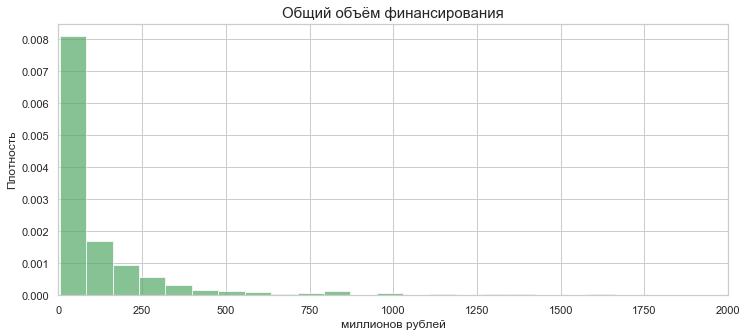

In [50]:
# посмотрм на распределение
plt.figure(figsize = (12,5)) 
millions = round(raw_data['Общий объём финансирования (руб.)'] / 1000000,0)
millions.hist(bins = 100, facecolor='g',alpha=0.7, density=True)

# Визуализируем
sns.set(style="whitegrid")

data = raw_data
plt.xlim(0, 2000)
plt.title('Общий объём финансирования', fontsize=15)
plt.xlabel("миллионов рублей")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()


In [51]:
millions.value_counts(normalize=True).head()

 8.00         0.05
18.00         0.05
20.00         0.03
40.00         0.02
19.00         0.02
Name: Общий объём финансирования (руб.), dtype: float64

#### Тип спортивного комплекса
<a name="16."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [52]:
#У нас он такой один. Найдем виды спорта тенис и посмотрим какой тип компликса у них
print("Пропуски" ,len(raw_data[raw_data['Тип спортивного комплекса'] == ''])
, "+ ", len(raw_data[raw_data['Тип спортивного комплекса'].isna()]))

display(raw_data[raw_data['Тип спортивного комплекса'].isna()].head())

Пропуски 0 +  1


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка
804,Центр большого тенниса,"Рязанская область, г. Рязань",300000000.00,теннис,Рязанская область,NaN,NaN,г. Рязань,Академия большого тенниса в Рязани состоит из ...,NaN,NaN,31.08.2015,NaN,300000000.00,0.00,0.00,0.00,Y,строительство,300000000.00


In [53]:
raw_data['sport_bool'] = raw_data['Виды спорта'].str.contains("теннис", na = ' ')
data = raw_data[raw_data['sport_bool'] == True]['Тип спортивного комплекса'].value_counts()

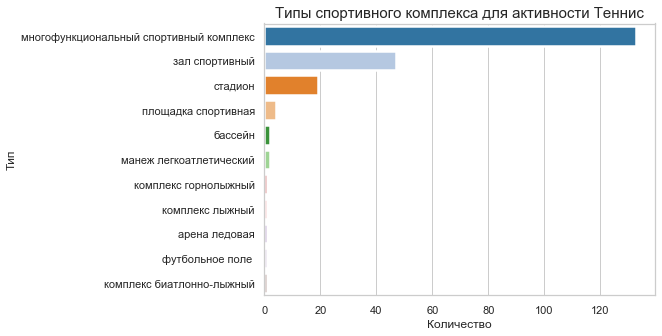

In [54]:
# Визуализируем
sns.set(style="whitegrid")
plt.figure(figsize = (7,5)) 

sns.barplot(y=data.index, x=data.values, palette="tab20", linewidth=2.5)
plt.title('Типы спортивного комплекса для активности Теннис', fontsize=15)
plt.xlabel("Количество")
plt.ylabel("Тип")
plt.show()


# Многофункциональнй комплекс нам не подходит - обозначим как спортивнй зал (2 по популярности ответ)

In [55]:
# Заполним fillna поскольку он у нас один и более детально не требуется
raw_data['Тип спортивного комплекса'] = raw_data['Тип спортивного комплекса'].fillna('зал спортивный')
display(raw_data[raw_data['Тип спортивного комплекса'].isna()].head())

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool


#### Виды спорта
<a name="17."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [56]:
#Есть на
print("Пропуски" ,len(raw_data[raw_data['Виды спорта'] == ''])
, "+ ", len(raw_data[raw_data['Виды спорта'].isna()]))

display(raw_data[raw_data['Виды спорта'].isna()].head())

Пропуски 0 +  54


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool
54,Многофункциональный зал,"Хабаровский край, г. Комсомольск-на-Амуре, ул....",47800000.00,NaN,Хабаровский край,зал спортивный,NaN,г. Комсомольск-на-Амуре,Предназначен для проведения учебных занятий фи...,"Здание одноэтажное, без подвала, прямоугольное...",...,30.12.2015,NaN,17500000.00,5500000.00,24800000.00,0.00,Y,строительство,47800000.00,
259,Физкультурно-оздоровительный комплекс,"Республика Чувашия, г. Алатырь",17500000.00,NaN,Республика Чувашия,многофункциональный спортивный комплекс,NaN,г. Алатырь,NaN,NaN,...,25.12.2007,NaN,17500000.00,0.00,0.00,0.00,Y,строительство,17500000.00,
265,Физкультурно-спортивный центр «Локомотив»,"Республика Чувашия, г. Канаш",38900000.00,NaN,Республика Чувашия,многофункциональный спортивный комплекс,NaN,с. Канаш,NaN,NaN,...,18.02.2008,NaN,38900000.00,0.00,0.00,0.00,Y,строительство,38900000.00,
270,ФОК «Атал»,"Республика Чувашия, с. Козловка",60000000.00,NaN,Республика Чувашия,многофункциональный спортивный комплекс,NaN,с. Козловка,NaN,NaN,...,07.09.2009,NaN,60000000.00,0.00,0.00,0.00,Y,строительство,60000000.00,
271,ФОК «Мариинский»,"Республика Чувашия, г. Мариинский Посад",60000000.00,NaN,Республика Чувашия,многофункциональный спортивный комплекс,NaN,г. Мариинский Посад,NaN,NaN,...,22.06.2010,NaN,60000000.00,0.00,0.00,0.00,Y,строительство,60000000.00,


In [57]:
raw_data['Есть виды спорта'] = 'N'
raw_data['Есть виды спорта'] = raw_data['Есть виды спорта'].where(raw_data['Виды спорта'].isna(), 'Y')

In [58]:
#Посмотрим есть ли связь с Тип спортивного комплекса
table_sport_type =raw_data.pivot_table(index=
    'Тип спортивного комплекса', columns='Есть виды спорта',values = 'Адрес', aggfunc='count', fill_value = 0).reset_index()

table_sport_type['total'] =  table_sport_type['N'] + table_sport_type['Y']
table_sport_type['N'] = table_sport_type['N']/table_sport_type['total'] * 100
table_sport_type['Y'] = table_sport_type['Y']/table_sport_type['total'] * 100
table_sport_type[table_sport_type['N'] > 0]

Есть виды спорта,Тип спортивного комплекса,N,Y,total
0,арена ледовая,2.70,97.30,74
1,бассейн,6.00,94.00,50
2,велотрек,33.33,66.67,3
3,зал спортивный,3.81,96.19,105
7,комплекс конно-спортивный,25.00,75.00,4
11,многофункциональный спортивный комплекс,11.30,88.70,301
13,площадка спортивная,9.09,90.91,11
14,стадион,4.23,95.77,142
17,футбольное поле,1.71,98.29,117


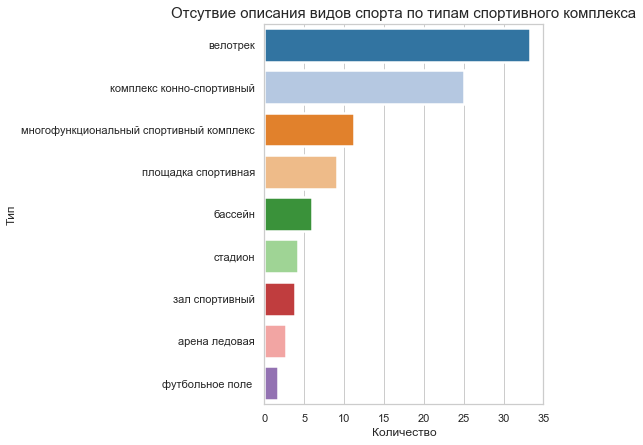

In [59]:
# Визуализируем
sns.set(style="whitegrid")
plt.figure(figsize = (5,7)) 
data = table_sport_type[table_sport_type['N'] > 0].sort_values(by = 'N' , ascending = False)
sns.barplot(y='Тип спортивного комплекса', x='N', data=data, palette="tab20", linewidth=2.5)
plt.title('Отсутвие описания видов спорта по типам спортивного комплекса', fontsize=15)
plt.ylabel("Тип")
plt.xlabel("Количество")
plt.show()

In [60]:
#Отлично сделаем на основании него Типа спорта. 
#Но похоже автоматизировать будет сложно. Если только не использовать  описание и вытянуть данные из него автопоиском.

In [61]:
# Возможно можно вытащить из описания?
raw_data['Краткое описание'][0]

'МБОУ ДОД СДЮСШОР г. Советский единственное учреждение дополнительного образования детей физкультурно – спортивной направленности Советского района, центр физкультурно – оздоровительной и спортивной работы, осуществляющей подготовку детей на высоком уровне. В феврале 2009 года было введено в эксплуатацию здание «Крытого плавательного бассейна» общей площадью 5172,4 м2, вместимостью 110 чел. в час. В здании находятся ванны для плавания с шестью дорожками по 25м и малая ванна для обучения плаванию. Общей площадью зеркала воды 460 м2. Так же в здании находится зал «сухого» плавания для специальной физической подготовки пловцов и тренажерный зал, оборудованный современными тренажерами. К услугам посетителей имеются помещения двух саун. В здании «Крытого плавательного бассейна» располагается муниципальное образовательное учреждение дополнительного образования детей Детско-юношеская спортивная школа «Арена». В вечернее время всеми услугами плавательного бассейна активно пользуются жители гор

In [62]:
# Вытащим список видов спорта
raw_data['Виды спорта'] = raw_data['Виды спорта'].replace('ё', 'е')
all_sports = []
for i in range(0,len(raw_data)):
    try:
        sports = raw_data.iloc[i]['Виды спорта']
        sport_list = sports.split(', ')
        for s in sport_list:
            all_sports.append(s)
    except:
            next
            
all_sports = set(all_sports)
#all_sports

In [63]:
# Лематизируем его
m = Mystem()
sport_lem = {}
for a in all_sports:
    v = a.lower()
    v = ''.join(m.lemmatize(str(v)))
    v = v.replace('\n', '')
    if v != 'го':
        sport_lem[v] = a

#sport_lem

In [64]:
#дополним логичными вариантам
sport_lem['фитнес'] = 'фитнес-аэробика'
sport_lem['аэробика'] = 'фитнес-аэробика'
sport_lem['плавательный'] = 'плавание'
sport_lem['бассейн'] = 'плавание'
sport_lem['ходьба'] = 'спортивная ходьба'
sport_lem['бильярд'] = 'бильярдный спорт'
sport_lem['единоборство'] = 'единоборства (разное)'
sport_lem['игровой'] = 'игровые виды спорта (разное)'
sport_lem['игровым'] = 'игровые виды спорта (разное)'
sport_lem['футбольный'] = 'футбол'
sport_lem['футбольно'] = 'футбол'
sport_lem['легкоатлетический'] = 'лёгкая атлетика'
sport_lem['легкоатлет'] = 'лёгкая атлетика'
sport_lem['конно'] = 'конный спорт'
sport_lem['конный'] = 'конный спорт'
sport_lem['физкультурный'] = 'общая физическая подготовка'

sport_lem

{'следж хоккей': 'следж хоккей',
 'хоккей на трава': 'хоккей на траве',
 'сават': 'сават',
 'современный пятиборье': 'современное пятиборье',
 'пауэрлифтинг': 'пауэрлифтинг',
 'художественный гимнастика': 'художественная гимнастика',
 'волейбол': 'волейбол',
 'армспорт (армрестлинг)': 'армспорт (армрестлинг)',
 'айкидо': 'айкидо',
 'футбол лицо с заболевание цп': 'футбол лиц с заболеванием ЦП',
 'парусный спорт': 'парусный спорт',
 'кинологический спорт': 'кинологический спорт',
 'мас-рестлинг': 'мас-рестлинг',
 'фехтование': 'фехтование',
 'греко-римский борьба': 'греко-римская борьба',
 'регби на коляска': 'регби на колясках',
 'практический стрельба': 'практическая стрельба',
 'настольный теннис': 'настольный теннис',
 'гандбол': 'гандбол',
 'таеквандо': 'тхэквондо',
 'перетягивание канат': 'перетягивание каната',
 'борьба на пояс': 'борьба на поясах',
 'спорт лицо с поражение ода': 'спорт лиц с поражением ОДА',
 'карате': 'каратэ',
 'бочча (паралимпийский вид)': 'бочча (паралимпийс

In [65]:
# обработаем описание
raw_data['Описание'] = raw_data['Название'].astype(str) + " " +raw_data[
    'Краткое описание'].astype(str) + " " + raw_data['Детальное описание'].astype(str)
raw_data['Описание'] = raw_data['Описание'].str.lower()
raw_data['Описание'] = raw_data['Описание'].str.replace('ё', 'е')
raw_data['Описание'] = raw_data['Описание'].str.replace('.', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace(',', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('&#', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('&nbsp', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('nannan', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('nan', ' ')

raw_data['Описание'].head()

0    крытый плавательный бассейн «садко» сдюсшор мб...
1    спортивный зал для мини-футбола отдельно стоящ...
2    ледовый дворец спорта ледовый дворец спорта в ...
3    спортивный центр с плавательным бассейном спор...
4    спортивный центр с универсальным игровым залом...
Name: Описание, dtype: object

In [66]:
# пропусков нет
raw_data[raw_data['Описание'].isna()]

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool,Есть виды спорта,Описание


In [67]:
# обработаем описание

def lem (base):
    text = base['Описание']
    return (' '.join(m.lemmatize((text))))

raw_data['Описание'] = raw_data.apply(lem, axis=1)

In [68]:
raw_data['Описание'] = raw_data['Описание'].str.replace('\n', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('   ', ' ')
raw_data['Описание'] = raw_data['Описание'].str.replace('  ', ' ')
# пример
raw_data['Описание'][580]

'центр олимпийский подготовка по спортивный ходьба центр олимпийский подготовка совмещать переход в здание крытый футбольный - легкоатлетический манеж на база объект быть располагаться гбу до « центр олимпийский подготовка республика мордовия по спортивный ходьба в м чегин » общий площадь здание – 12 043 51 м2  внутренний пространство комплекс предусматривать : - интернат на 73 человек для спортсмен заниматься легкий атлетика 40 48 номер 41 - зал для фитнес площадь 120 м2 - тренажерный зал 226 м2 - помещение медико - восстановительный центр 979 м2 - пищеблок с полный цикл на 100 место 40 обеденный зал на 70 место который быть работать по принцип « шведский стол » и банкетный зал на 30 место 41 - плавательный бассейн 25 х 16 м - административный помещение '

In [69]:
# есть ли пустоты
raw_data[raw_data['Описание'] == 'nan '].head(5)

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool,Есть виды спорта,Описание


In [70]:
# наконец сведем их
mis_types = []

for i in raw_data.index.to_list():
        types = []
        for key, value in sport_lem.items():
            try:
                if key in raw_data['Описание'][i]:
                    types.append(sport_lem[key])
            except:
                print(raw_data['Описание'][i])
        mis_types.append(', '.join(set(types)))

mis_types[0:5]

raw_data['Виды спорта 2'] = mis_types
raw_data['Виды спорта'] = raw_data['Виды спорта'].where(raw_data['Есть виды спорта'] == 'Y' , raw_data['Виды спорта 2'])


In [71]:
# что с пропусками?
raw_data[raw_data['Виды спорта'].isna()]

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool,Есть виды спорта,Описание,Виды спорта 2


In [72]:
# посмотрим визуально на то что нашли
raw_data['Виды спорта'] = raw_data['Виды спорта'].str.replace('  ', ' ')
raw_data[(raw_data['Есть виды спорта'] == 'N')].loc[:,['Виды спорта','Описание']].head()

,Виды спорта,Описание
54,,многофункциональный зал предназначать для пров...
259,общая физическая подготовка,физкультурный - оздоровительный комплекс
265,общая физическая подготовка,физкультурный - спортивный центр « локомотив »
270,,фок « атал »
271,,фок « мариинский »


In [73]:
# проверим почему не нашли в описании.
raw_data['Описание'][54]

'многофункциональный зал предназначать для проведение учебный занятие физический культура и спорт соревнование занятие в секция как школьников так и житель микрорайон здание одноэтажный без подвал прямоугольный с габарит в ось 54x18м  в состав многофункциональный зал \xa0 иметься набор следующий помещение : 1 41 комплекс раздевальный включать в себя раздевальный помещение для девочка и мальчик с - душевой кабина на 8 сетка каждый и санитарный узел на 2 кабинка каждый  2 41 помещение для преподавательский и тренерский состав  3 41 технический помещение включать в себя водомерный узел приточный вентиляционный камера вытяжной вентиляционный камера электрощитовая помещение моп '

In [74]:
# нашли 27. остальные удаляем т.к. не сможем найти инфмацию по олимпийскости видов спорта.
print("Нашли:",
      len(raw_data[(raw_data['Есть виды спорта'] == 'N') & (raw_data['Виды спорта'] != '')]))
print("НЕ нашли:",len(raw_data[(raw_data['Виды спорта'] == '')].loc[:,['Виды спорта','Описание']]))

Нашли: 27
НЕ нашли: 27


In [75]:
#  остальные 28 удаляем
raw_data = raw_data[raw_data['Виды спорта'] != '']
raw_data.head()

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Общий объём финансирования. Проверка,sport_bool,Есть виды спорта,Описание,Виды спорта 2
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,132844000.00,4261000.00,0.00,Y,строительство,147105000.00,False,Y,крытый плавательный бассейн « садко » сдюсшор ...,"общая физическая подготовка, плавание"
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,63014000.00,3315000.00,0.00,Y,строительство,83829000.00,False,Y,спортивный зал для мини-футбол отдельно стоящи...,"футбол, мини-футбол"
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,8293100.00,587035000.00,129396500.00,Y,строительство,814724600.00,False,Y,ледовый дворец спорт ледовый дворец спорт в го...,"шахматы, хореография, фигурное катание, плаван..."
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,...,150646000.00,1519000.00,0.00,Y,строительство,212165000.00,False,Y,спортивный центр с плавательный бассейн спорти...,"общая физическая подготовка, игровые виды спор..."
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",...,114058000.00,12388000.00,0.00,Y,строительство,143946000.00,True,Y,спортивный центр с универсальный игровой зал о...,"баскетбол, настольный теннис, теннис, игровые ..."


### Итог
<a name="18."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [76]:
# поменяем типы на даты

raw_data['Дата начала строительства / реконструкции'] = pd.to_datetime(raw_data[
    'Дата начала строительства / реконструкции'], format='%d.%m.%Y')
raw_data['Дата завершения строительства / реконструкции'] = pd.to_datetime(raw_data[
    'Дата завершения строительства / реконструкции'], format='%d.%m.%Y')

In [77]:
# откинем лишние столбцы
clean_data = raw_data[need_columns_extended].reset_index(drop=True)

In [78]:
#распечатаем базовую инфо
print_basic_info(clean_data,1,0,1,0)


  info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Название                                              810 non-null    object        
 1   Адрес                                                 810 non-null    object        
 2   Общий объём финансирования (руб.)                     810 non-null    float64       
 3   Виды спорта                                           810 non-null    object        
 4   Субъект федерации                                     810 non-null    object        
 5   Тип спортивного комплекса                             810 non-null    object        
 6   E-mail                                                458 non-null    object        
 7   Населённый пункт                                      810 non-null   

In [79]:
print_basic_info(clean_data,0,0,0,5)


  head 


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,2006-12-01,2008-12-31,NaN,10000000.00,132844000.00,4261000.00,0.00,Y,строительство
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",2007-06-01,2009-12-30,NaN,17500000.00,63014000.00,3315000.00,0.00,Y,строительство
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,2008-06-01,2011-11-05,NaN,90000000.00,8293100.00,587035000.00,129396500.00,Y,строительство
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,2006-12-15,2009-12-24,NaN,60000000.00,150646000.00,1519000.00,0.00,Y,строительство
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",2008-01-14,2011-12-30,NaN,17500000.00,114058000.00,12388000.00,0.00,Y,строительство


## 2. **Срез данных по списку спортивных объектов**
<a name="2."></a>

### Что необходимо досчитать
<a name="20."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [80]:
#Какие колонки нам нужны для выгрузки для клиента
client_columns = ["Название","Адрес",
                "Тип населенного пункта","Почтовый индекс",
                "E-mail","Даты крупных соревнований и значимых событий",
                "Общий объём финансирования (руб.)",
                "Общий объём финансирования (EUR)",
                "Общий объём финансирования (USD)",
                "Доля от объема финансирования в регионе",
                "Продолжительность строительства/реконструкции (дней)",
                "Наличие зимних олимписких видов спорта в видах спорта объекта"]

In [81]:
#Найдем сходствл в кейсах
def intersection(first, second):
    return [item for item in first if item in second]

#есть в wire, но нет в bulk
intersection_list  = intersection(raw_columns_list, client_columns)
intersection_list

['Название', 'Адрес', 'Общий объём финансирования (руб.)', 'E-mail']

In [82]:
#Найдем различие в кейсах
def diff(first, second):
    return [item for item in first if item not in second]

#есть в wire, но нет в bulk
diff_list  = diff(client_columns, raw_columns_list)
diff_list

['Тип населенного пункта',
 'Почтовый индекс',
 'Даты крупных соревнований и значимых событий',
 'Общий объём финансирования (EUR)',
 'Общий объём финансирования (USD)',
 'Доля от объема финансирования в регионе',
 'Продолжительность строительства/реконструкции (дней)',
 'Наличие зимних олимписких видов спорта в видах спорта объекта']

Это  то, что нужно досчитать

#### "Тип населенного пункта"
<a name="21."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [83]:
# найдем по адресу
locality = clean_data['Населённый пункт'].str.split(" ", n = 1, expand = True )
locality['Адрес'] = clean_data['Адрес']
locality.head()

,0,1,Адрес
0,г.,Советский,"Ханты-Мансийский автономный округ, г. Советски..."
1,г.,Лангепас,"Ханты-Мансийский автономный округ, г. Лангепас..."
2,г.,Сургут,"Ханты - Мансийский автономный округ, г. Сургут..."
3,пос.,Лыхма,"Ханты-Мансийский автономный округ, пос. Лыхма,..."
4,г.,Лангепас,"Ханты-Мансийский автономный округ-Югра, г. Лан..."


In [84]:
# обработаем
locality[0].value_counts()

г.              553
с.              127
пос.             55
пгт              48
ст.               9
дер.              8
р.п.              5
аул               2
Приволжский       1
Николаевская      1
р.п.Колывань      1
Name: 0, dtype: int64

In [85]:
# обработаем 
locality[0] = locality[0].replace('р.п.Колывань', 'р.п.')
locality[0] = locality[0].replace('Приволжский', '').replace('Николаевская', '')
locality[0] = locality[0].str.replace('.', '')
locality[0] = locality[0].replace('г', 'город').replace('го', 'город')
locality[0] = locality[0].replace('рабочий', 'рабочий посёлок').replace('рп', 'рабочий посёлок')
locality[0] = locality[0].replace('пос', 'посёлок').replace('сп', 'посёлок')
locality[0] = locality[0].replace('ст', 'станица').replace('с', 'село').replace(
    'дер', 'деревня')

locality[0].value_counts()

город              553
село               127
посёлок             55
пгт                 48
станица              9
деревня              8
рабочий посёлок      6
аул                  2
                     2
Name: 0, dtype: int64

In [86]:
# проверим одиночек
locality[locality[0] == '']

,0,1,Адрес
26,,сопка,"Красноярский край, Николаевская сопка, ул. Биа..."
474,,район,"Ивановская область, Приволжский район 400 м на..."


In [87]:
# заполним руками
locality.iloc[26,0] = 'город'
locality.iloc[474,0] = 'город'

In [88]:
print("Пропуски" ,len(locality[locality[0] == ''])
, "+", len(locality[locality[0].isna()]))

Пропуски 0 + 0


In [89]:
locality[0].value_counts()

город              555
село               127
посёлок             55
пгт                 48
станица              9
деревня              8
рабочий посёлок      6
аул                  2
Name: 0, dtype: int64

In [90]:
clean_data['Тип населенного пункта']  = locality[0]

clean_data.head(3)

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,Дата начала строительства / реконструкции,Дата завершения строительства / реконструкции,URL сайта,Финансирование из федерального бюджета,Финансирование из бюджета субъекта федерации,Финансирование из бюджета муниципального образования,Финансирование из внебюджетных источников,Активный,Действия с объектом,Тип населенного пункта
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,2006-12-01,2008-12-31,NaN,10000000.00,132844000.00,4261000.00,0.00,Y,строительство,город
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",2007-06-01,2009-12-30,NaN,17500000.00,63014000.00,3315000.00,0.00,Y,строительство,город
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,2008-06-01,2011-11-05,NaN,90000000.00,8293100.00,587035000.00,129396500.00,Y,строительство,город


#### Почтовый индекс
<a name="22."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [91]:
# по адресу определим индекс
clean_data['Почтовый индекс'] = None

In [92]:
def BS(page_text):
    page_bs = None
    page_bs = BeautifulSoup(page_text)
    return page_bs

def find_index(base):
    adress = base['Адрес']
    # наш url с информацией
    url = "https://indexphone.ru/?search=" + adress.replace(" ", "+")
    response = requests.get(url, headers=headers, allow_redirects=True)
    page_text = ''
    if response.status_code == 200:
        # BeautifulSoup
        page_bs = BS(response.text)
        try:
            # вытащим нужный кусок (если он есть)
            index = page_bs.find('span', {'class': 'post-search-list-postalcode'}).text
        except:
            return None
        return index 
    else:
        print(f'Ошибка! Response code: {response.status_code}')
        print(f'URL: {url}')
        print('--------------')
    

# т.к. вытягиваем по адресу должны много поймать 
clean_data['Почтовый индекс'] = clean_data.apply(find_index, axis=1)

In [93]:
print("Пропуски" ,len(clean_data[clean_data['Почтовый индекс'] == ''])
, "+ ", len(clean_data[clean_data['Почтовый индекс'].isna()]))

# в 16 случаях по адресу индекс не нашелся

Пропуски 0 +  16


In [94]:
#set(clean_data['Почтовый индекс'].to_list())

#### Даты крупных соревнований и значимых событий
<a name="23."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [95]:
# Даты крупных соревнований и значимых событий вытащим из краткого описания. 

events = clean_data['Краткое описание'].str.split('Даты крупных соревнований и значимых событий:', expand = True)

In [96]:
events
# Рассмотрим ближе что во 2 столбце и 1. 

,0,1,2
0,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,None,None
1,"Отдельно стоящее здание, расположено на обособ...",Финал Кубка России среди юношей 2000г.р. по м...,None
2,Ледовый Дворец спорта в городе Сургуте открыт ...,"- 05, 06 марта 2013 года – Первенство России ...",None
3,Спортивный центр с плавательным бассейном в п....,None,None
4,"Отдельно стоящее здание, расположено на обособ...",None,None
...,...,...,...
805,"Проводятся занятия детей ДЮСШ, групп здоровья ...",None,None
806,NaN,NaN,NaN
807,Реконструкция футбольного поля способствует п...,None,None
808,Строительство ФОК способствует увеличению коли...,None,None


In [97]:
# сколько таких
len(events[events[2].isna() == False])

2

In [98]:
events[events[2].isna() == False].iloc[0,1]

' Кубок России, Чемпионат и первенство России, Спартакиада молодежи, Водный турнир на призы ИППО. '

In [99]:
events[events[2].isna() == False].iloc[0,2]

' Кубок России, Чемпионат и первенство России, Спартакиада молодежи, Водный турнир на призы ИППО. 08.05.2015 – 11.05.2015 – Кубок России по гребному слалому  21.07.2015 – 26.07.2015 – Чемпионат России по гребному слалому.  В конце июля открылся центр гребного слалома в Окуловке Завершилось строительство «Регионального центра гребного слалома в г. Окуловка» Новгородской области на реке Перетно. Церемонию открытия спортивного объекта была приурочена к проведению чемпионата России по гребному слалому, который проходил в Окуловке с 21 по 26 июля 2015 года. Объект предназначен для проведения тренировок и соревнований по гребному слалому. В состав центра гребного слалома входят эллинги для хранения лодок, административное здание с медпунктом, тренажерным залом, кафе, судейскими и тренерскими комнатами, а также хозяйственно-бытовой блок со столовой и подсобными помещениями. Кроме того, на базе объекта установлена сцена для проведения торжественных церемоний и зона активного отдыха. Берега рек

In [100]:
# Берем 2 и пишем в 1

events[1] = events[1].where(events[2].isna(), events[2])

In [101]:
# А теперь  поправим битые символы аски кодов
events[1][785]

' День рождение спорткомплекса – декабрь &#40 отчетное мероприятие за год&#41   Кубок Заполярного района – 28 февраля  Межмуниципальная Спартакиада – 28 марта – 2 апреля. '

In [102]:
events[1] = events[1].str.replace('&#37', '%')
events[1] = events[1].str.replace('&#40', '(')
events[1] = events[1].str.replace('&#41', ')')
events[1] = events[1].str.replace('&#43', '+')
events[1] = events[1].str.replace('\xa0', ' ')
events[1] = events[1].str.replace('&#96', "'")
events[1] = events[1].str.replace('&#1', " ")

events

,0,1,2
0,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,None,None
1,"Отдельно стоящее здание, расположено на обособ...",Финал Кубка России среди юношей 2000г.р. по м...,None
2,Ледовый Дворец спорта в городе Сургуте открыт ...,"- 05, 06 марта 2013 года – Первенство России ...",None
3,Спортивный центр с плавательным бассейном в п....,None,None
4,"Отдельно стоящее здание, расположено на обособ...",None,None
...,...,...,...
805,"Проводятся занятия детей ДЮСШ, групп здоровья ...",None,None
806,NaN,NaN,NaN
807,Реконструкция футбольного поля способствует п...,None,None
808,Строительство ФОК способствует увеличению коли...,None,None


In [103]:
events[1][785]

' День рождение спорткомплекса – декабрь ( отчетное мероприятие за год)   Кубок Заполярного района – 28 февраля  Межмуниципальная Спартакиада – 28 марта – 2 апреля. '

In [104]:
clean_data['Даты крупных соревнований и значимых событий'] = events[1]

In [105]:
# нашли 197 кейсов 

len(clean_data[clean_data['Даты крупных соревнований и значимых событий'].isna() == False])

197

#### Общий объём финансирования EUR и USD
<a name="24."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [106]:
# сегодня
dt = datetime.datetime.today().strftime("%d.%m.%Y")

In [107]:
def currency_by_date(COD, dt):
    # Отсюда распарсим курс табличкой
    url = 'https://cbr.ru/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=' + dt
    try:
        table = pd.read_html(url)[0]
        table['Курс_1_рублю'] = table['Курс']/10000 / table['Единиц']
        return table[table['Букв. код'] == COD]['Курс_1_рублю'].values[0]
    except: 
        return None

In [108]:
# рассчет EUR
COD = 'EUR'
dt = datetime.datetime.today().strftime("%d.%m.%Y")

clean_data['EUR_today'] = currency_by_date(COD, dt)
clean_data['Общий объём финансирования (EUR)'] = clean_data['Общий объём финансирования (руб.)'] / clean_data['EUR_today']



In [109]:
# проверка
print("Пропуски" ,len(clean_data[clean_data['Общий объём финансирования (EUR)'] == 0])
, "+ ", len(clean_data[clean_data['Общий объём финансирования (EUR)'].isna()]))

Пропуски 0 +  0


In [110]:
# рассчет USD, вытаскиваем нужную дату

def USD_date(base):
    COD = 'USD'
    dt = base['end_date']
    try:
        return currency_by_date(COD, dt)
    except: 
        return None

    
clean_data['end_date'] = clean_data['Дата завершения строительства / реконструкции'].dt.strftime("%d.%m.%Y")
clean_data['USD_date'] = clean_data.apply(USD_date, axis=1)

In [111]:
clean_data['Общий объём финансирования (USD)'] = clean_data[
    'Общий объём финансирования (руб.)'] / clean_data['USD_date']

In [112]:
# У кого нет информации о дате?
print(len(clean_data[clean_data['Дата завершения строительства / реконструкции'].isna()]))

13


In [113]:
# проверим

In [114]:
clean_data[(clean_data['Общий объём финансирования (USD)'].isna() == False ) & clean_data[
    'Дата завершения строительства / реконструкции'].isna()]['Дата завершения строительства / реконструкции']

Series([], Name: Дата завершения строительства / реконструкции, dtype: datetime64[ns])

In [115]:
# проверка
print("Пропуски" ,len(clean_data[clean_data['Общий объём финансирования (USD)'] == 0])
, "+ ", len(clean_data[clean_data['Общий объём финансирования (USD)'].isna()]))

clean_data.head(3)

Пропуски 0 +  13


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Активный,Действия с объектом,Тип населенного пункта,Почтовый индекс,Даты крупных соревнований и значимых событий,EUR_today,Общий объём финансирования (EUR),end_date,USD_date,Общий объём финансирования (USD)
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,Y,строительство,город,628240,None,82.64,1780072.34,31.12.2008,29.38,5006909.37
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,Y,строительство,город,628671,Финал Кубка России среди юношей 2000г.р. по м...,82.64,1014388.93,30.12.2009,29.85,2808426.38
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,Y,строительство,город,628408,"- 05, 06 марта 2013 года – Первенство России ...",82.64,9858731.68,05.11.2011,30.84,26414533.88


In [116]:
clean_data['USD_date'].describe()

count       797.00
mean         37.43
std          14.56
min          23.33
25%          29.93
50%          31.06
75%          35.02
max          79.50
Name: USD_date, dtype: float64

#### Доля от объема финансирования в регионе
<a name="25."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [117]:
# найдем сумму 
sub_sum = clean_data.groupby(['Субъект федерации'])['Общий объём финансирования (руб.)'].sum().reset_index()
sub_sum.columns = ['Субъект федерации', 'Суммарный объем финансирования - строительство (руб.)']
sub_sum

,Субъект федерации,Суммарный объем финансирования - строительство (руб.)
0,Алтайский край,465988021.00
1,Амурская область,243921000.00
2,Архангельская область,922821600.00
3,Астраханская область,2924360433.00
4,Белгородская область,871190000.00
...,...,...
77,Ханты-Мансийский АО,2146055710.00
78,Челябинская область,438272022.00
79,Чеченская Республика,374569000.00
80,Ямало-Ненецкий АО,18000000.00


In [118]:
# найдем долю 
clean_data = clean_data.merge(sub_sum, on = 'Субъект федерации')
clean_data['Доля от объема финансирования в регионе'] =  clean_data['Общий объём финансирования (руб.)'] / clean_data['Суммарный объем финансирования - строительство (руб.)']



In [119]:
# проверим
print("Пропуски" ,len(clean_data[clean_data['Доля от объема финансирования в регионе'] == 0])
, "+ ", len(clean_data[clean_data['Доля от объема финансирования в регионе'].isna()]))

clean_data.head()

Пропуски 0 +  0


,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Тип населенного пункта,Почтовый индекс,Даты крупных соревнований и значимых событий,EUR_today,Общий объём финансирования (EUR),end_date,USD_date,Общий объём финансирования (USD),Суммарный объем финансирования - строительство (руб.),Доля от объема финансирования в регионе
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,город,628240,None,82.64,1780072.34,31.12.2008,29.38,5006909.37,2146055710.00,0.07
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,город,628671,Финал Кубка России среди юношей 2000г.р. по м...,82.64,1014388.93,30.12.2009,29.85,2808426.38,2146055710.00,0.04
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,город,628408,"- 05, 06 марта 2013 года – Первенство России ...",82.64,9858731.68,05.11.2011,30.84,26414533.88,2146055710.00,0.38
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,...,посёлок,628173,None,82.64,2567343.38,24.12.2009,30.50,6956069.86,2146055710.00,0.10
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",...,город,628672,None,82.64,1741846.25,30.12.2011,32.02,4495544.93,2146055710.00,0.07


#### "Продолжительность строительства/реконструкции (дней)"
<a name="26."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [120]:
# расчитаем

clean_data['Продолжительность строительства/реконструкции (дней)'] = (clean_data[
    'Дата завершения строительства / реконструкции'] - clean_data[
    'Дата начала строительства / реконструкции']) / np.timedelta64(1,'D')


clean_data.head()

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Почтовый индекс,Даты крупных соревнований и значимых событий,EUR_today,Общий объём финансирования (EUR),end_date,USD_date,Общий объём финансирования (USD),Суммарный объем финансирования - строительство (руб.),Доля от объема финансирования в регионе,Продолжительность строительства/реконструкции (дней)
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",147105000.00,плавание,Ханты-Мансийский АО,бассейн,ukmps@mail.ru,г. Советский,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,...,628240,None,82.64,1780072.34,31.12.2008,29.38,5006909.37,2146055710.00,0.07,761.00
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.00,"игровые виды спорта (разное), мини-футбол, общ...",Ханты-Мансийский АО,зал спортивный,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...",...,628671,Финал Кубка России среди юношей 2000г.р. по м...,82.64,1014388.93,30.12.2009,29.85,2808426.38,2146055710.00,0.04,943.00
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,628408,"- 05, 06 марта 2013 года – Первенство России ...",82.64,9858731.68,05.11.2011,30.84,26414533.88,2146055710.00,0.38,1252.00
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.00,"аквааэробика, плавание",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NurtdinovRA@admbel.ru,пос. Лыхма,Спортивный центр с плавательным бассейном в п....,Общая площадь объекта составляет 2111 м2. Пере...,...,628173,None,82.64,2567343.38,24.12.2009,30.50,6956069.86,2146055710.00,0.10,1105.00
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.00,"баскетбол, бодибилдинг, волейбол, настольный т...",Ханты-Мансийский АО,многофункциональный спортивный комплекс,NaN,г. Лангепас,"Отдельно стоящее здание, расположено на обособ...","Общая площадь объекта составляет 3092,8 м2. Пе...",...,628672,None,82.64,1741846.25,30.12.2011,32.02,4495544.93,2146055710.00,0.07,1446.00


In [121]:
#проверим
print("Пропуски" ,len(clean_data[clean_data['Продолжительность строительства/реконструкции (дней)'] == 0])
, "+", len(clean_data[clean_data['Продолжительность строительства/реконструкции (дней)'].isna()]))


Пропуски 0 + 117


In [122]:
# не добавились ли даты без всей информации
clean_data[(clean_data['Продолжительность строительства/реконструкции (дней)'].isna()== False) & ((clean_data[
    'Дата завершения строительства / реконструкции'].isna()) | (clean_data[
    'Дата начала строительства / реконструкции'].isna()))]

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Почтовый индекс,Даты крупных соревнований и значимых событий,EUR_today,Общий объём финансирования (EUR),end_date,USD_date,Общий объём финансирования (USD),Суммарный объем финансирования - строительство (руб.),Доля от объема финансирования в регионе,Продолжительность строительства/реконструкции (дней)


In [123]:
clean_data['Продолжительность строительства/реконструкции (дней)'].describe()

count       693.00
mean       1027.75
std         911.43
min           6.00
25%         443.00
50%         715.00
75%        1294.00
max        8016.00
Name: Продолжительность строительства/реконструкции (дней), dtype: float64

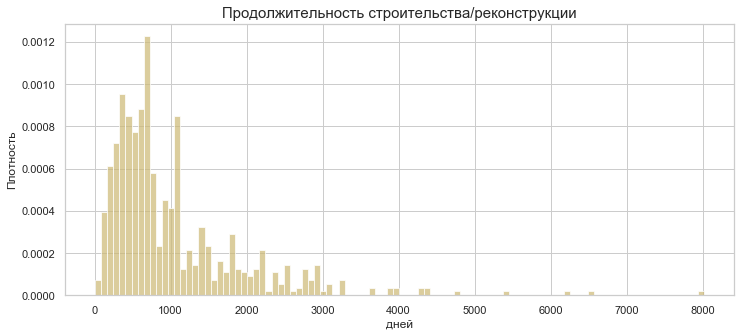

In [124]:
# посмотрм на распределение
# Визуализируем
plt.figure(figsize = (12,5)) 
clean_data['Продолжительность строительства/реконструкции (дней)'].hist(bins = 100, facecolor='y',alpha=0.7, density=True)

sns.set(style="whitegrid")
plt.title('Продолжительность строительства/реконструкции', fontsize=15)
plt.xlabel("дней")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()


#### Наличие зимних олимписких видов спорта в видах спорта объекта
<a name="27."></a>
[<font size="1">(к содержанию)</font>](#1common.)


In [125]:
#найдем виды спорта
url = "https://olympic.ru/team/sport/"
response = requests.get(url, headers=headers, allow_redirects=True)
page_text = ''
if response.status_code == 200:
    page_bs = BS(response.text)
    list_olympic = page_bs.find('ul', {'class': 'treeview-menu'}).text
else:
    print(f'Ошибка! Response code: {response.status_code}')
    print(f'URL: {url}')
    print('--------------')
    
list_olympic = list_olympic.lower().splitlines()
list_olympic[48:]

['зимние',
 '',
 'все',
 'биатлон',
 'бобслей',
 'горнолыжный спорт',
 'керлинг',
 'конькобежный спорт',
 'лыжное двоеборье',
 'лыжные гонки',
 'прыжки на лыжах с трамплина',
 'санный спорт',
 'скелетон',
 'сноуборд',
 'фигурное катание на коньках',
 'фристайл',
 'хоккей',
 'шорт трек',
 '',
 '']

In [126]:
#выделим зимние
list_olympic = list_olympic[51:-2]
list_olympic.sort(reverse=False)
list_olympic

['биатлон',
 'бобслей',
 'горнолыжный спорт',
 'керлинг',
 'конькобежный спорт',
 'лыжное двоеборье',
 'лыжные гонки',
 'прыжки на лыжах с трамплина',
 'санный спорт',
 'скелетон',
 'сноуборд',
 'фигурное катание на коньках',
 'фристайл',
 'хоккей',
 'шорт трек']

In [127]:
#в добавим фигурное катание, а не 'фигурное катание на коньках'
list_olympic.append('фигурное катание')

In [128]:
def is_olympic(base):
    try:
        sports = base['Виды спорта'].replace('ё','е')
        sport_list = sports.split(', ')
    except:
        return None
    for s in sport_list:
        if s in list_olympic:
            return True
    return False

clean_data['Наличие зимних олимписких видов спорта в видах спорта объекта'] = clean_data.apply(is_olympic, axis=1)

In [129]:
# какой процент ?
clean_data['Наличие зимних олимписких видов спорта в видах спорта объекта'].mean()

0.2123456790123457

In [130]:
print("Пропуски", len(clean_data[clean_data['Наличие зимних олимписких видов спорта в видах спорта объекта'].isna()]))

Пропуски 0


In [131]:
clean_data[clean_data['Наличие зимних олимписких видов спорта в видах спорта объекта'] == True].head(3)

,Название,Адрес,Общий объём финансирования (руб.),Виды спорта,Субъект федерации,Тип спортивного комплекса,E-mail,Населённый пункт,Краткое описание,Детальное описание,...,Даты крупных соревнований и значимых событий,EUR_today,Общий объём финансирования (EUR),end_date,USD_date,Общий объём финансирования (USD),Суммарный объем финансирования - строительство (руб.),Доля от объема финансирования в регионе,Продолжительность строительства/реконструкции (дней),Наличие зимних олимписких видов спорта в видах спорта объекта
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.00,"аквааэробика, греко-римская борьба, общая физи...",Ханты-Мансийский АО,арена ледовая,lds2011@list.ru,г. Сургут,Ледовый Дворец спорта в городе Сургуте открыт ...,Общая площадь объекта составляет 21 247 м2. Пе...,...,"- 05, 06 марта 2013 года – Первенство России ...",82.64,9858731.68,05.11.2011,30.84,26414533.88,2146055710.00,0.38,1252.00,True
5,Крытый хоккейный корт,"Хантымансийский АО, пгт Игрим, ул. Промышленна...",250351000.00,"фигурное катание, хоккей",Ханты-Мансийский АО,арена ледовая,sk-aisberg@mail.ru,пгт Игрим,Наименование учреждения на базе данного спорти...,Общая площадь объекта составляет 4374 м2. Пере...,...,"Март, Ежегодный детский турнир по хоккею с ша...",82.64,3029420.41,16.09.2014,37.99,6590594.98,2146055710.00,0.12,2829.00,True
15,"ДЮСШ № 7, отделение футбола","Забайкальский край, г. Чита, ул. Вайнштейна, 3",8450000.00,"лёгкая атлетика, футбол, хоккей, хоккей с мячом",Забайкальский край,футбольное поле,NaN,г. Чита,На МСК «Темп» проводится огромное количество с...,Искусственное футбольное поле 3 поколения. Исп...,...,None,82.64,102250.85,01.12.2009,29.07,290690.67,613163582.00,0.01,nan,True


### Итог
<a name="28."></a>
[<font size="1">(к содержанию)</font>](#1common.)



In [132]:
# уберем рабочие столбцы
clean_data = clean_data[need_columns_extended + diff_list]

In [133]:
#Выгружаем только необходимые стобцы клиенту
data_sports_facilities = clean_data[client_columns]

In [134]:
#распечатаем базовую инфо
print_basic_info(data_sports_facilities,1,0,1,0)


  info  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Название                                                       810 non-null    object 
 1   Адрес                                                          810 non-null    object 
 2   Тип населенного пункта                                         810 non-null    object 
 3   Почтовый индекс                                                794 non-null    object 
 4   E-mail                                                         458 non-null    object 
 5   Даты крупных соревнований и значимых событий                   197 non-null    object 
 6   Общий объём финансирования (руб.)                              810 non-null    float64
 7   Общий объём финансирования (EUR)                   

In [135]:
print_basic_info(data_sports_facilities,0,0,0,5)


  head 


,Название,Адрес,Тип населенного пункта,Почтовый индекс,E-mail,Даты крупных соревнований и значимых событий,Общий объём финансирования (руб.),Общий объём финансирования (EUR),Общий объём финансирования (USD),Доля от объема финансирования в регионе,Продолжительность строительства/реконструкции (дней),Наличие зимних олимписких видов спорта в видах спорта объекта
0,Крытый плавательный бассейн «Садко» СДЮСШОР,"Ханты-Мансийский автономный округ, г. Советски...",город,628240,ukmps@mail.ru,None,147105000.00,1780072.34,5006909.37,0.07,761.00,False
1,Спортивный зал для мини-футбола,"Ханты-Мансийский автономный округ, г. Лангепас...",город,628671,NaN,Финал Кубка России среди юношей 2000г.р. по м...,83829000.00,1014388.93,2808426.38,0.04,943.00,False
2,Ледовый дворец спорта,"Ханты - Мансийский автономный округ, г. Сургут...",город,628408,lds2011@list.ru,"- 05, 06 марта 2013 года – Первенство России ...",814724600.00,9858731.68,26414533.88,0.38,1252.00,True
3,Спортивный центр с плавательным бассейном,"Ханты-Мансийский автономный округ, пос. Лыхма,...",посёлок,628173,NurtdinovRA@admbel.ru,None,212165000.00,2567343.38,6956069.86,0.10,1105.00,False
4,Спортивный центр с универсальным игровым залом,"Ханты-Мансийский автономный округ-Югра, г. Лан...",город,628672,NaN,None,143946000.00,1741846.25,4495544.93,0.07,1446.00,False


In [136]:
#сохраняем 

data_sports_facilities.to_csv('data_sports_facilities.csv', index=False)

## 3. Отчет по субъектам федерации:
<a name="3."></a>
####  "Суммарный объем финансирования - строительство (руб.)"
<a name="31."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [137]:
# Расчеты уже есть. Проверим заполненность

print('Пропусков:',len(sub_sum[sub_sum['Суммарный объем финансирования - строительство (руб.)'].isna()]))

sub_sum

Пропусков: 0


,Субъект федерации,Суммарный объем финансирования - строительство (руб.)
0,Алтайский край,465988021.00
1,Амурская область,243921000.00
2,Архангельская область,922821600.00
3,Астраханская область,2924360433.00
4,Белгородская область,871190000.00
...,...,...
77,Ханты-Мансийский АО,2146055710.00
78,Челябинская область,438272022.00
79,Чеченская Республика,374569000.00
80,Ямало-Ненецкий АО,18000000.00


####  Количество спортивных объектов
<a name="32."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [138]:
# Расчеты

sub_count = clean_data.groupby(['Субъект федерации'])['Адрес'].count().reset_index()
sub_count.columns = ['Субъект федерации', 'Количество спортивных объектов']

In [139]:
# Проверка

print('Пропусков:',len(sub_count[sub_count['Количество спортивных объектов'].isna()]))

sub_count

Пропусков: 0


,Субъект федерации,Количество спортивных объектов
0,Алтайский край,5
1,Амурская область,3
2,Архангельская область,5
3,Астраханская область,12
4,Белгородская область,13
...,...,...
77,Ханты-Мансийский АО,7
78,Челябинская область,5
79,Чеченская Республика,7
80,Ямало-Ненецкий АО,1


####  Перечень типов спортивных объеков
<a name="33."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [140]:
# Расчеты

sub_types = clean_data.groupby(['Субъект федерации'])['Тип спортивного комплекса'].unique().reset_index()
sub_types.columns = ['Субъект федерации', 'Перечень типов спортивных объеков']

In [141]:
def sort_inside(base):
    lst= base['Перечень типов спортивных объеков']
    try: 
        lst_s = list(sorted(set(lst)))
        return lst_s
    except:
        return None
        
sub_types['Перечень типов спортивных объеков'] = sub_types.apply(sort_inside, axis=1)

In [142]:
# Проверка

print('Пропусков:',len(sub_types[sub_types['Перечень типов спортивных объеков'].isna()]))

sub_types

Пропусков: 0


,Субъект федерации,Перечень типов спортивных объеков
0,Алтайский край,"[бассейн, многофункциональный спортивный компл..."
1,Амурская область,[многофункциональный спортивный комплекс]
2,Архангельская область,"[арена ледовая, бассейн, многофункциональный с..."
3,Астраханская область,"[многофункциональный спортивный комплекс, стад..."
4,Белгородская область,"[арена ледовая, бассейн, зал спортивный, много..."
...,...,...
77,Ханты-Мансийский АО,"[арена ледовая, бассейн, зал спортивный, много..."
78,Челябинская область,"[бассейн, зал спортивный, манеж легкоатлетичес..."
79,Чеченская Республика,"[многофункциональный спортивный комплекс, футб..."
80,Ямало-Ненецкий АО,[арена ледовая]


####  ТОП-5 доступных видов спорта
<a name="34."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [143]:
# расчет

def top5_sports(base):
    region = base['Субъект федерации']
    # выделим только наш регион
    tmp_base = clean_data[clean_data['Субъект федерации'] == region]
    
    # добавим все виды спорта
    all_sports = []
    for i in range(0,len(tmp_base)):
        try:
            sports = tmp_base.iloc[i]['Виды спорта']
            sport_list = sports.split(', ')
            for s in sport_list:
                all_sports.append(s)
        except:
            next
    #группируем, сортируем и ищем 5 доступных
    cnt = dict(Counter(all_sports))
    big_set = sorted(set(cnt.values()), reverse= True)
    l_top5 = list(itertools.islice(big_set, 5))
    # ловим все подходящие
    d_top5 = {}
    for l in l_top5:
        for key, value in cnt.items(): 
            if l==value:
                d_top5[key]=value
    return d_top5


sub_types['ТОП-5 доступных видов спорта'] = sub_types.apply(top5_sports, axis=1)

In [144]:
# проверяем

print('Пропусков:',len(sub_types[sub_types['ТОП-5 доступных видов спорта'].isna()]))

sub_types

Пропусков: 0


,Субъект федерации,Перечень типов спортивных объеков,ТОП-5 доступных видов спорта
0,Алтайский край,"[бассейн, многофункциональный спортивный компл...","{'плавание': 4, 'игровые виды спорта (разное)'..."
1,Амурская область,[многофункциональный спортивный комплекс],"{'плавание': 2, 'вольная борьба': 1, 'настольн..."
2,Архангельская область,"[арена ледовая, бассейн, многофункциональный с...","{'бадминтон': 2, 'баскетбол': 2, 'волейбол': 2..."
3,Астраханская область,"[многофункциональный спортивный комплекс, стад...","{'мини-футбол': 8, 'футбол': 8, 'баскетбол': 7..."
4,Белгородская область,"[арена ледовая, бассейн, зал спортивный, много...","{'футбол': 6, 'плавание': 5, 'баскетбол': 5, '..."
...,...,...,...
77,Ханты-Мансийский АО,"[арена ледовая, бассейн, зал спортивный, много...","{'плавание': 4, 'общая физическая подготовка':..."
78,Челябинская область,"[бассейн, зал спортивный, манеж легкоатлетичес...","{'бокс': 3, 'бодибилдинг': 2, 'лёгкая атлетика..."
79,Чеченская Республика,"[многофункциональный спортивный комплекс, футб...","{'бокс': 4, 'футбол': 3, 'восточное боевое еди..."
80,Ямало-Ненецкий АО,[арена ледовая],"{'конькобежный спорт': 1, 'фигурное катание': ..."


### Итог
<a name="35."></a>
[<font size="1">(к содержанию)</font>](#1common.)

In [145]:
#сводим
report_subjects_rf = sub_count.merge(sub_sum, on = 'Субъект федерации').merge(sub_types, on = 'Субъект федерации')

In [146]:
#распечатаем базовую инфо
print_basic_info(report_subjects_rf,1,0,0,0)


  info  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Субъект федерации                                      82 non-null     object 
 1   Количество спортивных объектов                         82 non-null     int64  
 2   Суммарный объем финансирования - строительство (руб.)  82 non-null     float64
 3   Перечень типов спортивных объеков                      82 non-null     object 
 4   ТОП-5 доступных видов спорта                           82 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ KB
None


In [147]:
print_basic_info(report_subjects_rf,0,0,0,5)


  head 


,Субъект федерации,Количество спортивных объектов,Суммарный объем финансирования - строительство (руб.),Перечень типов спортивных объеков,ТОП-5 доступных видов спорта
0,Алтайский край,5,465988021.00,"[бассейн, многофункциональный спортивный компл...","{'плавание': 4, 'игровые виды спорта (разное)'..."
1,Амурская область,3,243921000.00,[многофункциональный спортивный комплекс],"{'плавание': 2, 'вольная борьба': 1, 'настольн..."
2,Архангельская область,5,922821600.00,"[арена ледовая, бассейн, многофункциональный с...","{'бадминтон': 2, 'баскетбол': 2, 'волейбол': 2..."
3,Астраханская область,12,2924360433.00,"[многофункциональный спортивный комплекс, стад...","{'мини-футбол': 8, 'футбол': 8, 'баскетбол': 7..."
4,Белгородская область,13,871190000.00,"[арена ледовая, бассейн, зал спортивный, много...","{'футбол': 6, 'плавание': 5, 'баскетбол': 5, '..."


In [148]:
#сохраняем 
report_subjects_rf.to_csv('report_subjects_rf.csv', index=False)